In [820]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

# Town Centre

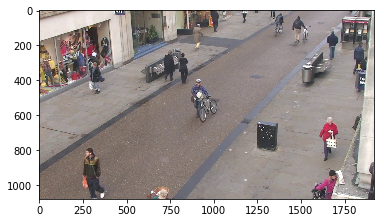

In [821]:
vs = cv2.VideoCapture('TownCentreXVID.avi')
success,frame = vs.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

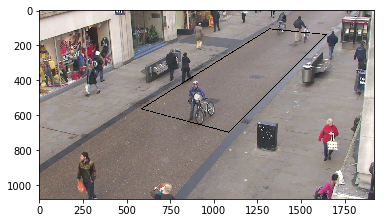

In [822]:
img = cv2.imread('town_centre_img.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

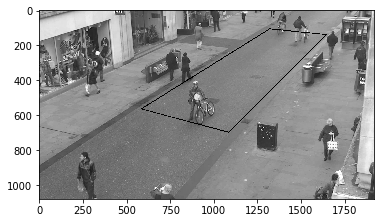

In [823]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

## Find find contours

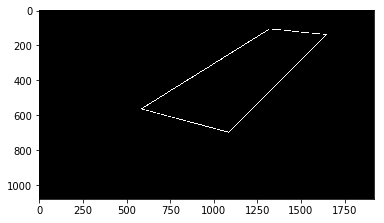

In [824]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=1)
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, 'gray')

In [825]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [826]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

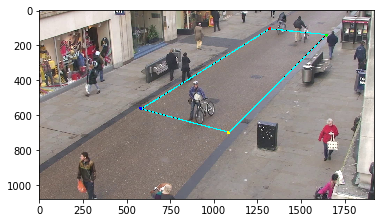

In [827]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img, extRight, 8, (0, 255, 0), -1)
cv2.circle(img, extTop, 8, (255, 0, 0), -1)
cv2.circle(img, extBot, 8, (255, 255, 0), -1)
plt.imshow(img)

In [828]:
print(extLeft)
print(extRight)
print(extTop)
print(extBot)

(582, 562)
(1647, 143)
(1322, 105)
(1085, 700)


In [829]:
img.shape

(1080, 1920, 3)

## Bird eye view

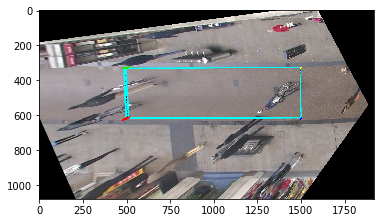

In [830]:
src = np.float32([extLeft, extBot, extTop, extRight])
x = 1500
y = 620
z = 330
q = 500
dst = np.float32([[x, y], [x, z], [q, y], [q, z]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

warped_img = cv2.warpPerspective(img, M, (1920, 1080)) # Image warping
plt.imshow(warped_img) # Show results
plt.show()

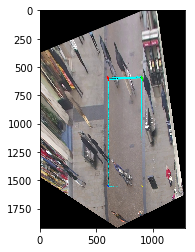

In [831]:
src = np.float32([extTop, extRight, extBot, extLeft])
x1 = 600
x2 = 900
y1 = 600
y2 = 1550

dst = np.float32([[x1, y1], [x2, y1], [x2, y2], [x1, y2]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

warped_img = cv2.warpPerspective(img, M, (1280, 1920)) # Image warping
plt.imshow(warped_img) # Show results
plt.show()

## Mapping a point

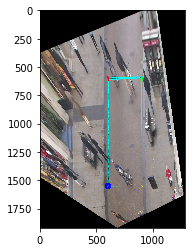

In [832]:
p = extLeft
px = (M[0][0]*p[0] + M[0][1]*p[1] + M[0][2]) / ((M[2][0]*p[0] + M[2][1]*p[1] + M[2][2]))
py = (M[1][0]*p[0] + M[1][1]*p[1] + M[1][2]) / ((M[2][0]*p[0] + M[2][1]*p[1] + M[2][2]))
p_after = (int(px), int(py))
# Draw the new point
cv2.circle(warped_img, p_after, 20, (0,0,255), 12)
plt.imshow(warped_img) # Show results
plt.show()

# People video

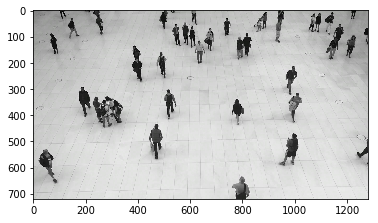

In [833]:
vs = cv2.VideoCapture('../People.mp4')
success,frame = vs.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
# cv2.imwrite("people_frame.jpg", frame)

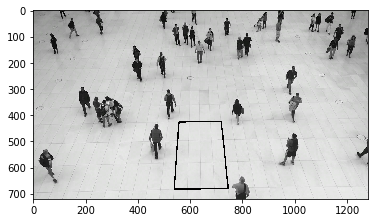

In [834]:
img = cv2.imread('people_frame_.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

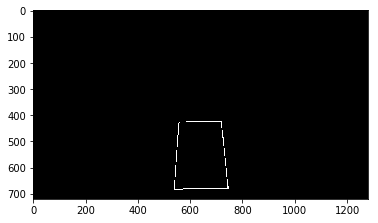

In [835]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=1)
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, 'gray')

In [836]:
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(contours)
c = max(cnts, key=cv2.contourArea)

# determine the most extreme points along the contour
extLeftBot = tuple((c[:, :, 0].min(), c[:, :, 1].max()))
extLeftTop = tuple((c[:, :, 0].min()+20, c[:, :, 1].min()))
extRightTop = tuple((c[:, :, 0].max()-25, c[:, :, 1].min()))
extRightBot = tuple((c[:, :, 0].max(), c[:, :, 1].max()))

for p in [extLeftBot, extLeftTop, extRightBot, extRightTop]:
    print(p)

(538, 684)
(558, 422)
(746, 684)
(721, 422)


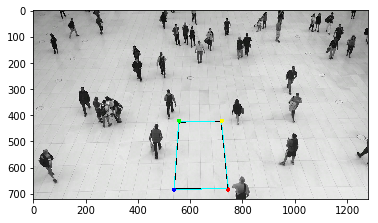

In [837]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
cv2.circle(img, extLeftBot, 8, (0, 0, 255), -1)
cv2.circle(img, extLeftTop, 8, (0, 255, 0), -1)
cv2.circle(img, extRightBot, 8, (255, 0, 0), -1)
cv2.circle(img, extRightTop, 8, (255, 255, 0), -1)
plt.imshow(img)

# Bird eye view

In [838]:
img.shape

(720, 1280, 3)

[[721. 422.]
 [558. 422.]
 [538. 684.]
 [746. 684.]]
[[585. 555.]
 [690. 555.]
 [690. 705.]
 [585. 705.]]


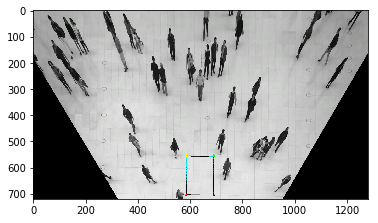

In [839]:
src = np.float32([extRightTop, extLeftTop, extLeftBot, extRightBot])
print(src)
x1 = 585
x2 = 690
y1 = 555
y2 = 705

dst = np.float32([[x1, y1], [x2, y1], [x2, y2], [x1, y2]])
print(dst)
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

warped_img = cv2.warpPerspective(img, M, (1280, 720)) # Image warping
plt.imshow(warped_img) # Show results
plt.show()